In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

C:\Users\Natasha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Natasha\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_daily = pd.read_csv("data_daily.csv", index_col=[0], parse_dates=[0], low_memory=False)

In [6]:
hourly_train_df = pd.read_csv("hourly_train_df.csv", index_col=[0], parse_dates=[0], low_memory=False)
hourly_test_df = pd.read_csv("hourly_test_df.csv", index_col=[0], parse_dates=[0], low_memory=False)
data_hourly = pd.concat([hourly_train_df, hourly_test_df])

In [3]:
data_daily.head(10)

,day_comsump,Wind_Direction,Wind_Speed,Temperature1,Pressure1,Humidity1
Date,,,,,,
2013-01-01,181831,209.611111,5.277778,273.801667,1018.848282,65.040506
2013-01-02,283575,313.750000,3.916667,267.900833,1019.541667,61.592257
2013-01-03,297982,266.000000,3.666667,266.004583,1018.875000,55.083333
2013-01-04,300015,219.083333,4.458333,269.733333,1020.043010,61.345919
2013-01-05,277100,247.583333,4.958333,268.062135,1025.141265,71.042143
2013-01-06,256235,227.916667,4.666667,271.768333,1022.708333,64.899859
2013-01-07,283290,222.958333,5.625000,273.882500,1016.277022,76.248756
2013-01-08,286418,242.500000,3.791667,269.705417,1025.125000,73.477979
2013-01-09,279457,196.125000,4.416667,273.418792,1020.875000,69.106172


In [4]:
data_daily.dtypes

day_comsump         int64
Wind_Direction    float64
Wind_Speed        float64
Temperature1      float64
Pressure1         float64
Humidity1         float64
dtype: object

In [5]:
data_daily.describe()

,day_comsump,Wind_Direction,Wind_Speed,Temperature1,Pressure1,Humidity1
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,273637.279678,191.959685,3.723925,282.822882,1019.647371,75.600284
std,38613.810800,70.726075,1.706416,10.993454,9.610192,14.660777
min,181831.000000,20.750000,0.166667,252.129583,993.000000,29.987292
25%,245663.000000,140.437500,2.500000,274.530833,1013.250000,65.125000
50%,268026.000000,198.000000,3.416667,283.351125,1018.500000,76.083333
75%,295290.000000,246.333333,4.708333,292.394792,1025.625000,86.958333
max,444102.000000,347.416667,10.291667,303.118750,1053.500000,100.000000


In [22]:
plt.style.use('ggplot')

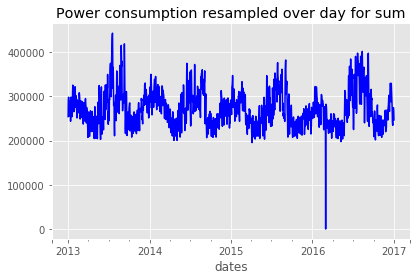

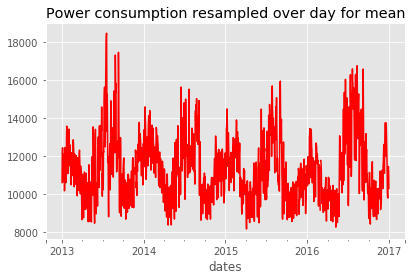

In [24]:
data_hourly.COMED_MW.resample('D').sum().plot(title='Power consumption resampled over day for sum', color='blue') 
plt.tight_layout()
plt.show()   

data_hourly.COMED_MW.resample('D').mean().plot(title='Power consumption resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

### Sum of power consumption resampled over month

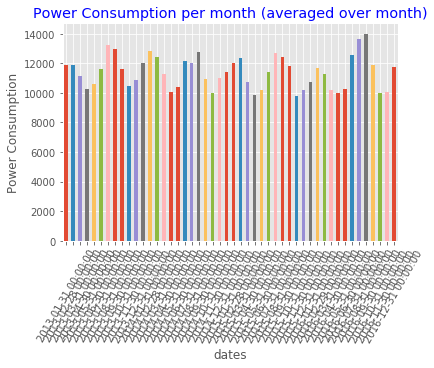

In [27]:
data_hourly['COMED_MW'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Power Consumption')
plt.title('Power Consumption per month (averaged over month)', color='blue')
plt.show()

### Mean of power consumption resampled over quarter

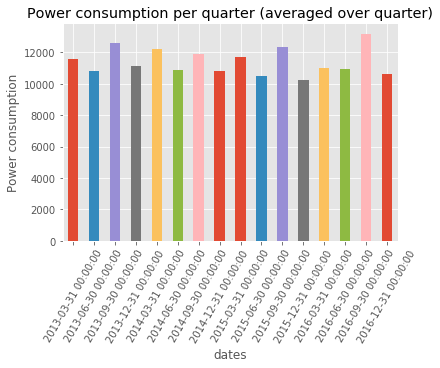

In [29]:
data_hourly['COMED_MW'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Power consumption')
plt.title('Power consumption per quarter (averaged over quarter)')
plt.show()

### Resampling over week

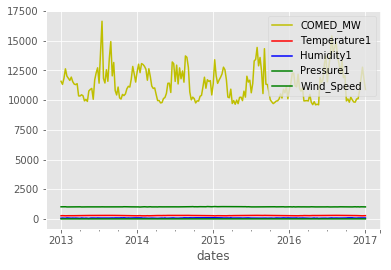

In [30]:
## resampling over week and computing mean
data_hourly.COMED_MW.resample('W').mean().plot(color='y', legend=True)
data_hourly.Temperature1.resample('W').mean().plot(color='r', legend=True)
data_hourly.Humidity1.resample('W').mean().plot(color='b', legend=True)
data_hourly.Pressure1.resample('W').mean().plot(color='g', legend=True)
data_hourly.Wind_Speed.resample('W').mean().plot(color='g', legend=True)
plt.show()

C:\Users\Natasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Natasha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


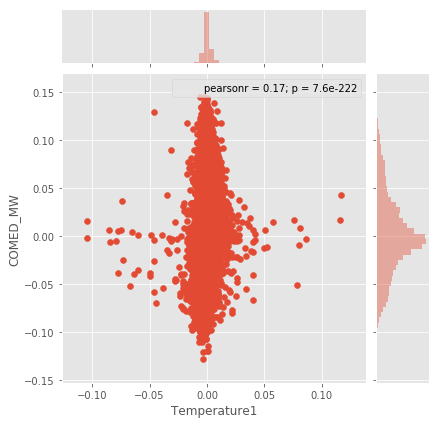

In [33]:
## The correlations between 'Temperature', 'COMED_MW'
data_returns = data_hourly.pct_change()
sns.jointplot(x='Temperature1', y='COMED_MW', data=data_returns)  

plt.show()

### Correlations among features

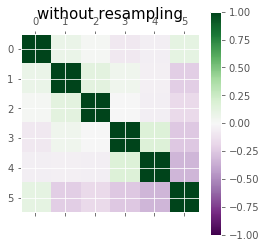

In [34]:
# Correlations among columns
plt.matshow(data_hourly.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

<Figure size 1440x720 with 0 Axes>

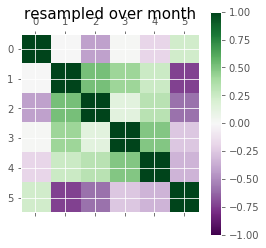

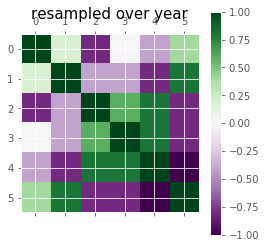

In [37]:
# Correlations of mean of features resampled over months
plt.figure(figsize=(20,10))
plt.matshow(data_hourly.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(data_hourly.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

## LSTM Data preparation and feature engineering

In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
data_daily.head(10)

,day_comsump,Wind_Direction,Wind_Speed,Temperature1,Pressure1,Humidity1
Date,,,,,,
2013-01-01,181831,209.611111,5.277778,273.801667,1018.848282,65.040506
2013-01-02,283575,313.750000,3.916667,267.900833,1019.541667,61.592257
2013-01-03,297982,266.000000,3.666667,266.004583,1018.875000,55.083333
2013-01-04,300015,219.083333,4.458333,269.733333,1020.043010,61.345919
2013-01-05,277100,247.583333,4.958333,268.062135,1025.141265,71.042143
2013-01-06,256235,227.916667,4.666667,271.768333,1022.708333,64.899859
2013-01-07,283290,222.958333,5.625000,273.882500,1016.277022,76.248756
2013-01-08,286418,242.500000,3.791667,269.705417,1025.125000,73.477979
2013-01-09,279457,196.125000,4.416667,273.418792,1020.875000,69.106172


In [18]:
data_hourly_subset = data_daily[['day_comsump', 'Wind_Speed', 'Temperature1', 'Pressure1']]

In [19]:
data_hourly_subset.shape

(1491, 4)

In [20]:
values = data_hourly_subset.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
values = values.astype('float32')
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.000000   0.504801   0.425033   0.427244  0.387935
2   0.387935   0.370370   0.309306   0.438705  0.442866
3   0.442866   0.345679   0.272117   0.427686  0.450618
4   0.450618   0.423868   0.345245   0.446992  0.363246
5   0.363246   0.473251   0.312469   0.531261  0.283691


In [21]:
# split into train and test sets
values = reframed.values

n_train_time = 1338
train = values[:1338, :]
test = values[1339:1461, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1338, 1, 4) (1338,) (122, 1, 4) (122,)


In [22]:
values = reframed.values
X, y = values[:,:-1], values[:,-1]
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(X.shape, y.shape)

(1490, 1, 4) (1490,)


In [59]:
new_data = pd.DataFrame(reframed[-1:].values)
reframed = reframed.append(new_data)
reframed.shape

C:\Users\Natasha\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


(35040, 16)

Model architecture

1) LSTM with 100 neurons in the first visible layer

2) dropout 20%

3) 1 neuron in the output layer for predicting Global_active_power.

4) The input shape will be 1 time step with 4 features.

5) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

6) The model will be fit for 20 training epochs with a batch size of 70.

Train on 1338 samples, validate on 122 samples
Epoch 1/20
 - 1s - loss: 0.0846 - val_loss: 0.0242
Epoch 2/20
 - 0s - loss: 0.0264 - val_loss: 0.0163
Epoch 3/20
 - 0s - loss: 0.0208 - val_loss: 0.0171
Epoch 4/20
 - 0s - loss: 0.0187 - val_loss: 0.0147
Epoch 5/20
 - 0s - loss: 0.0182 - val_loss: 0.0141
Epoch 6/20
 - 0s - loss: 0.0169 - val_loss: 0.0137
Epoch 7/20
 - 0s - loss: 0.0161 - val_loss: 0.0131
Epoch 8/20
 - 0s - loss: 0.0156 - val_loss: 0.0125
Epoch 9/20
 - 0s - loss: 0.0145 - val_loss: 0.0120
Epoch 10/20
 - 0s - loss: 0.0138 - val_loss: 0.0113
Epoch 11/20
 - 0s - loss: 0.0132 - val_loss: 0.0109
Epoch 12/20
 - 0s - loss: 0.0123 - val_loss: 0.0102
Epoch 13/20
 - 0s - loss: 0.0119 - val_loss: 0.0098
Epoch 14/20
 - 0s - loss: 0.0113 - val_loss: 0.0092
Epoch 15/20
 - 0s - loss: 0.0105 - val_loss: 0.0088
Epoch 16/20
 - 0s - loss: 0.0098 - val_loss: 0.0084
Epoch 17/20
 - 0s - loss: 0.0098 - val_loss: 0.0080
Epoch 18/20
 - 0s - loss: 0.0092 - val_loss: 0.0076
Epoch 19/20
 - 0s - loss: 

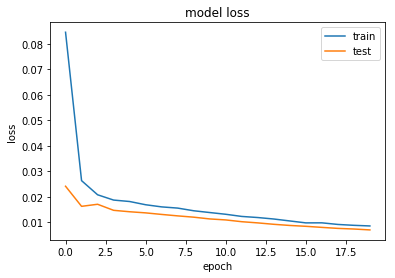

Test RMSE: 21979.817


In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 4))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -3:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [12]:
np.save("actual_daily.npy", inv_y)
np.save("predicted_daily.npy", inv_yhat)

In [55]:
data_plot = data_daily.iloc[:1460,:]

In [56]:
data_plot = data_plot.drop(['Wind_Direction', 'Wind_Speed', 'Temperature1', 'Pressure1', 'Humidity1'], axis=1)

In [57]:
data_plot_pred = data_plot.copy()

In [58]:
data_plot_pred['label'] = 'Train'

In [59]:
data_plot_pred.loc[1338:,'label'] = 'Test'

In [60]:
data_plot_pred[data_plot_pred.label == 'Test']['day_comsump'] = inv_yhat

C:\Users\Natasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
data_plot_pred = data_plot_pred.drop(['label'], axis = 1)

In [63]:
data_plot_pred = data_plot_pred.iloc[1338:,:]

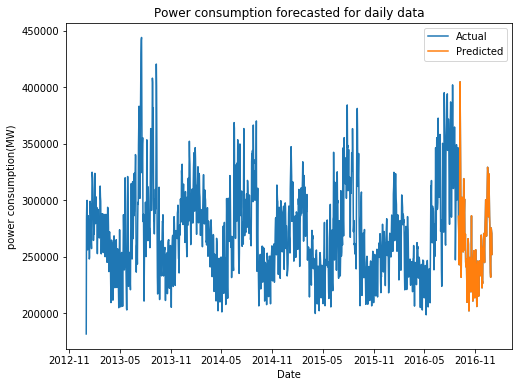

In [66]:
# summarize history for loss
plt.figure(figsize=(8, 6))
plt.plot(data_plot['day_comsump'])
plt.plot(data_plot_pred['day_comsump'])
plt.title('Power consumption forecasted for daily data')
plt.ylabel('power consumption(MW)')
plt.xlabel('Date')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

In [67]:
resid = pd.DataFrame()

In [68]:
resid['Actual'] = inv_y

In [69]:
resid['Fitted'] = inv_yhat

In [70]:
resid['Residuals'] = resid['Actual']-resid['Fitted']

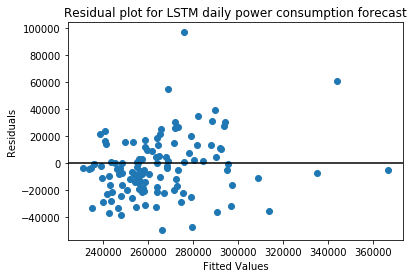

In [78]:
plt.scatter(x=resid['Fitted'], y=resid['Residuals'])
plt.axhline(y=0, color='black')
plt.title('Residual plot for LSTM daily power consumption forecast')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()